# Data Cleaning Steps

Step 1 :Loading and inspecting data
Step 2 :Deleting columns
Step 3 :Handling duplicates
Step 4 :Data type conversion
Step 5 :Handling missing data
Step 6 :Dealing with outliers


In [7]:
import pandas as pd
data = pd.read_excel("C:/Users/aiswa/OneDrive/DataScience/DuplicateData.xlsx")

In [ ]:
#Step 2 : Deleting columns
    data.drop(['column1','column2'],axis=1,inplace=True) # axis -1 is for column
    #inplace=True to drop the columns in the same dataframe

In [8]:
#Step 3: Handling Duplicate Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   square_feet         8 non-null      int64 
 1   advertisement_date  8 non-null      object
 2   advertised_price    8 non-null      int64 
 3   sale_date           8 non-null      object
 4   sale_price          8 non-null      int64 
 5   property_category   8 non-null      object
dtypes: int64(3), object(3)
memory usage: 516.0+ bytes


In [9]:
data[data.duplicated()]

,square_feet,advertisement_date,advertised_price,sale_date,sale_price,property_category
2,1200,20.5.2013,4000000,10.6.2023,4000000,Apartment


In [12]:
data=data.drop_duplicates()

In [13]:
data.head(10)

,square_feet,advertisement_date,advertised_price,sale_date,sale_price,property_category
0,700,10.5.2003,400000,1.6.2023,400000,Apartment
1,1200,20.5.2013,4000000,10.6.2023,4000000,Apartment
3,566,10.5.2013,400000,1.5.2023,400000,Apartment
4,458,10.5.2003,600000,1.6.2023,400000,Apartment
5,678,24.5.2013,400000,1.6.2023,400000,Apartment
6,800,10.5.2004,900000,1.6.2023,400000,Apartment
7,234,10.5.2003,400000,1.6.2023,400000,Apartment


In [14]:
data= data.reset_index(drop=True)

In [15]:
data.head(10)

,square_feet,advertisement_date,advertised_price,sale_date,sale_price,property_category
0,700,10.5.2003,400000,1.6.2023,400000,Apartment
1,1200,20.5.2013,4000000,10.6.2023,4000000,Apartment
2,566,10.5.2013,400000,1.5.2023,400000,Apartment
3,458,10.5.2003,600000,1.6.2023,400000,Apartment
4,678,24.5.2013,400000,1.6.2023,400000,Apartment
5,800,10.5.2004,900000,1.6.2023,400000,Apartment
6,234,10.5.2003,400000,1.6.2023,400000,Apartment


In [17]:
#Also if we need to conside only specific columns,
data.drop_duplicates(subset=['square_feet', 'advertisement_date'])

,square_feet,advertisement_date,advertised_price,sale_date,sale_price,property_category
0,700,10.5.2003,400000,1.6.2023,400000,Apartment
1,1200,20.5.2013,4000000,10.6.2023,4000000,Apartment
2,566,10.5.2013,400000,1.5.2023,400000,Apartment
3,458,10.5.2003,600000,1.6.2023,400000,Apartment
4,678,24.5.2013,400000,1.6.2023,400000,Apartment
5,800,10.5.2004,900000,1.6.2023,400000,Apartment
6,234,10.5.2003,400000,1.6.2023,400000,Apartment


#Step 4 :Data type conversion
Sometimes, data types might be incorrectly set. For example, a date column might be interpreted as strings.
You need to convert these to their appropriate types.

In [122]:
# Converting advertisement_date and sale_date columns to datetime
data[['advertisement_date', 'sale_date']] = data[['advertisement_date', 'sale_date']].apply(pd.to_datetime, dayfirst =  True)

In [102]:
data.head(10)

,square_feet,advertisement_date,advertised_price,sale_date,sale_price,property_category
0,700,2003-05-10,400000,2023-06-01,400000,Apartment
1,1200,2013-05-20,1200000,2023-06-10,1210000,Apartment
2,1200,2013-05-20,853000,2023-06-10,850000,Apartment
3,566,2013-05-10,3000500,2023-05-01,3000100,Apartment
4,458,NaT,4250000,2023-06-01,400000,Apartment
5,678,2013-05-24,2550000,2023-06-01,2550000,Apartment
6,800,2004-05-10,12000000,NaT,12000000,NaN
7,234,2003-05-10,4250000,NaT,400000,NaN


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   square_feet         8 non-null      int64         
 1   advertisement_date  7 non-null      datetime64[ns]
 2   advertised_price    8 non-null      int64         
 3   sale_date           6 non-null      datetime64[ns]
 4   sale_price          8 non-null      int64         
 5   property_category   6 non-null      object        
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 512.0+ bytes


How to convert string to int in pandas?
Convert Strings to Integers in Pandas DataFrame
(1) The astype(int) approach: df["dataframe_column"] = df["dataframe_column"].astype(int)
(2) The apply(int) approach: df["dataframe_column"] = df["dataframe_column"].apply(int)
(2) The map(int) approach: df["dataframe_column"] = df["dataframe_column"].map(int)

#Step 5 :Handling missing data
    Deleting Rows With Missing Values:If the number of rows with missing data is insignificant compared to the total number of observations, you might consider deleting these rows.
    Imputing Missing Values
 

If you have significant missing data, a better strategy than deleting could be imputation. This process involves filling in missing values based on other data. For numerical data, common imputation methods involve using a measure of central tendency (mean, median, mode).

In [123]:
data=data.drop(6)

In [124]:
data.head(10)

,square_feet,advertisement_date,advertised_price,sale_date,sale_price,property_category
0,700,2003-05-10,400000.0,2023-06-01,400000,Apartment
1,1200,2013-05-20,1200000.0,2023-06-10,1210000,Apartment
2,1200,2013-05-20,NaN,2023-06-10,850000,Apartment
3,566,2013-05-10,3000500.0,2023-05-01,3000100,Apartment
4,458,NaT,4250000.0,2023-06-01,400000,Apartment
5,678,2013-05-24,2550000.0,2023-06-01,2550000,Apartment
7,234,2003-05-10,NaN,NaT,400000,NaN


In [125]:
data[['advertisement_date', 'sale_date']] = data[['advertisement_date', 'sale_date']].apply(lambda x: x.fillna(x.mean()))

In [126]:
data.head(10)

,square_feet,advertisement_date,advertised_price,sale_date,sale_price,property_category
0,700,2003-05-10,400000.0,2023-06-01 00:00:00,400000,Apartment
1,1200,2013-05-20,1200000.0,2023-06-10 00:00:00,1210000,Apartment
2,1200,2013-05-20,NaN,2023-06-10 00:00:00,850000,Apartment
3,566,2013-05-10,3000500.0,2023-05-01 00:00:00,3000100,Apartment
4,458,2010-01-14,4250000.0,2023-06-01 00:00:00,400000,Apartment
5,678,2013-05-24,2550000.0,2023-06-01 00:00:00,2550000,Apartment
7,234,2003-05-10,NaN,2023-05-29 20:00:00,400000,NaN


In [127]:
data[['advertisement_date', 'sale_date']] = data[['advertisement_date', 'sale_date']].apply(lambda x: x.dt.strftime('%Y-%m-%d'))

Now, let’s see how we can impute missing categorical values.

Categorical data is a type of data that is used to group information with similar characteristics. Each of these groups is a category. Categorical data can take on numerical values (such as "1" indicating "male" and "2" indicating "female"), but those numbers do not have mathematical meaning. You can't add them together, for instance.

Categorical data is typically divided into two categories:

Nominal data: This is when the categories are only labeled and cannot be arranged in any particular order. Examples include gender (male, female), blood type (A, B, AB, O), or color (red, green, blue).
Ordinal data: This is when the categories can be ordered or ranked. While the intervals between the categories are not equally spaced, the order of the categories has a meaning. Examples include rating scales (1 to 5 rating of a movie), an education level (high school, undergraduate, graduate), or stages of cancer (Stage I, Stage II, Stage III).
For imputing missing categorical data, the mode is typically used. In our example, the column property_category is categorical (nominal) data, and there’s data missing in two rows.

Let’s replace the missing values with mode.

In [128]:
data['property_category'] = data['property_category'].fillna(data['property_category'].mode()[0])

In [129]:
data.head(10)

,square_feet,advertisement_date,advertised_price,sale_date,sale_price,property_category
0,700,2003-05-10,400000.0,2023-06-01,400000,Apartment
1,1200,2013-05-20,1200000.0,2023-06-10,1210000,Apartment
2,1200,2013-05-20,NaN,2023-06-10,850000,Apartment
3,566,2013-05-10,3000500.0,2023-05-01,3000100,Apartment
4,458,2010-01-14,4250000.0,2023-06-01,400000,Apartment
5,678,2013-05-24,2550000.0,2023-06-01,2550000,Apartment
7,234,2003-05-10,NaN,2023-05-29,400000,Apartment


## Dealing with Outliers
Outliers are data points in a dataset that are distinctly different from the other observations. They may lie exceptionally far from the other values in the data set, residing outside an overall pattern. They're considered unusual due to their values either being significantly higher or lower compared to the rest of the data.

Outliers can arise due to various reasons such as:

Measurement or input errors
Data corruption
True statistical anomalies
Outliers can significantly impact the results of your data analysis and statistical modeling. They can lead to a skewed distribution, bias, or invalidate the underlying statistical assumptions, distort the estimated model fit, reduce the predictive accuracy of predictive models, and lead to incorrect conclusions.

Some commonly used methods to detect outliers are Z-score, IQR (Interquartile Range), box plots, scatter plots, and data visualization techniques. In some advanced cases, machine learning methods are used as well.

Visualizing data can help identify outliers. Seaborn's boxplot is handy for this.


In [130]:
data[['advertised_price', 'sale_price']]

,advertised_price,sale_price
0,400000.0,400000
1,1200000.0,1210000
2,NaN,850000
3,3000500.0,3000100
4,4250000.0,400000
5,2550000.0,2550000
7,NaN,400000


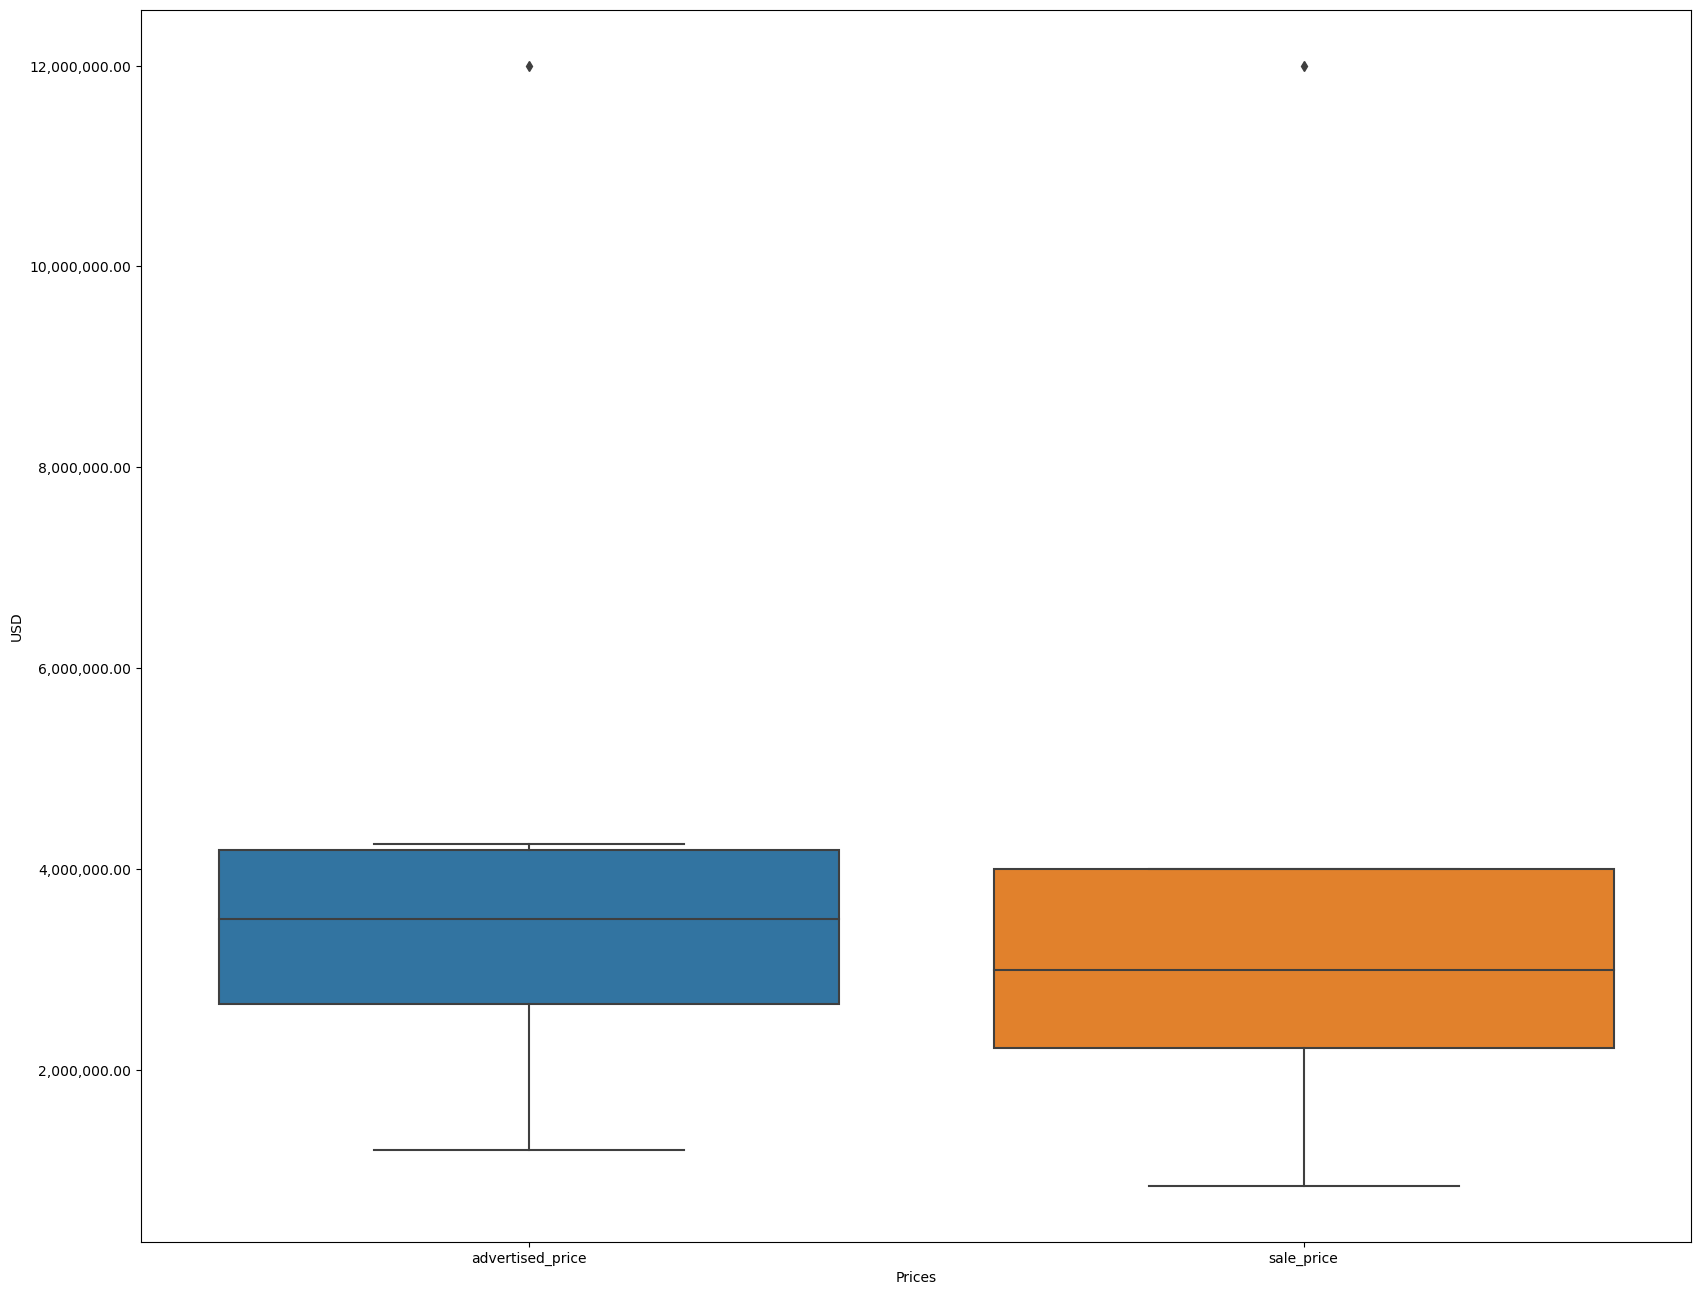

In [137]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(20, 16))
sns.boxplot(data[['advertised_price','sale_price']])
plt.xlabel('Prices')
plt.ylabel('USD')
plt.ticklabel_format(style='plain', axis='y')
formatter = ticker.FuncFormatter(lambda x, p: format(x, ',.2f'))
plt.gca().yaxis.set_major_formatter(formatter)

In [142]:
for column in['advertised_price','sale_price']:
    Q1= data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR = Q3-Q1
    data= data[~((data[column]<(Q1-1.5*IQR))|(data[column]>(Q3+1.5*IQR)))]

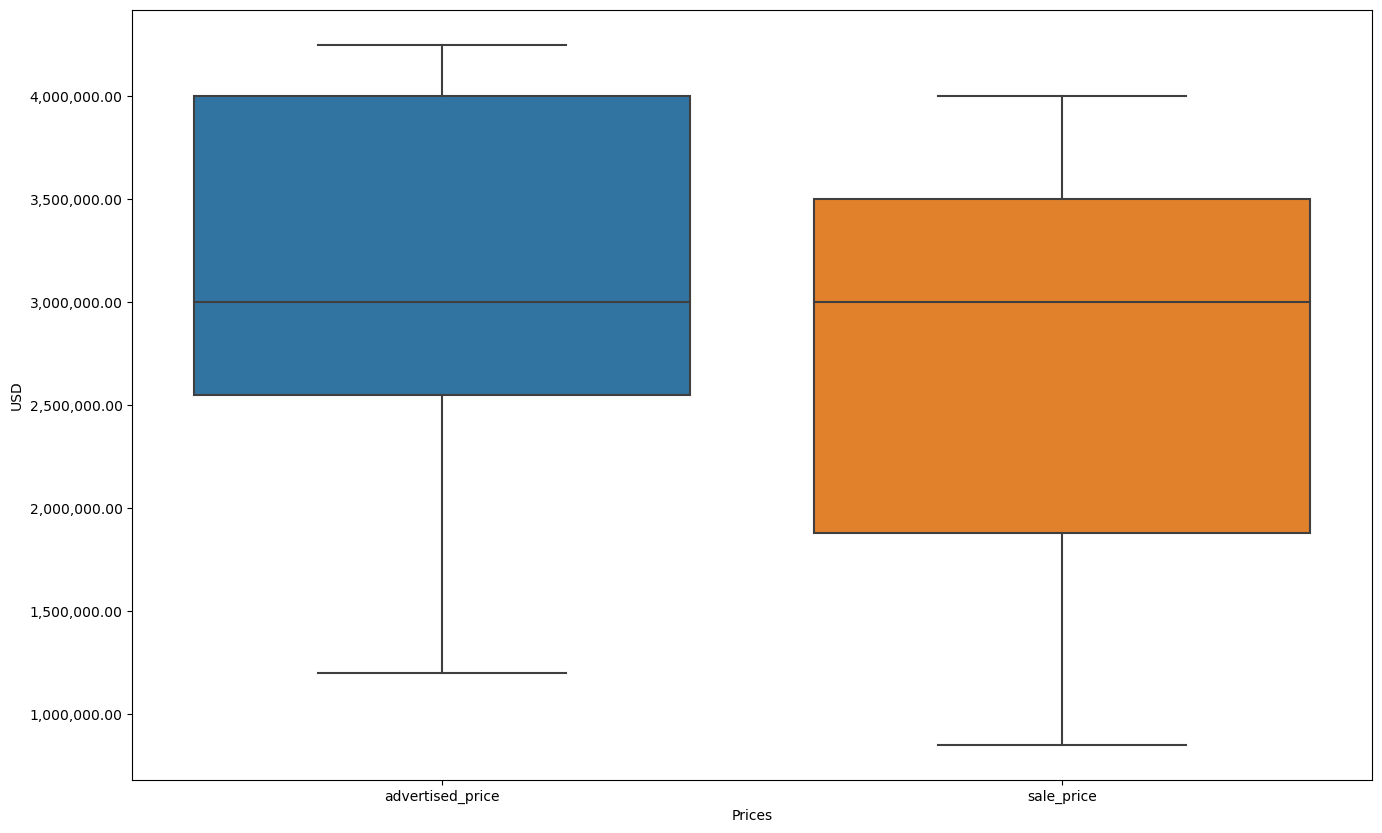

In [143]:
plt.figure(figsize=(16, 10))
sns.boxplot(data[['advertised_price','sale_price']])
plt.xlabel('Prices')
plt.ylabel('USD')
plt.ticklabel_format(style='plain', axis='y')
formatter = ticker.FuncFormatter(lambda x, p: format(x, ',.2f'))
plt.gca().yaxis.set_major_formatter(formatter)

Conclusion
 

Data cleaning is a crucial step in the data analysis process. Though it can be time-consuming, it's essential to ensure the accuracy of your findings.

Fortunately, Python's rich ecosystem of libraries makes this process more manageable. We learned how to remove unnecessary rows and columns, reformat data, and deal with missing values and outliers. These are the usual steps that have to be performed on most any data. However, you’ll also sometimes need to combine two columns into one, verify the existing data, assign labels to it, or get rid of the white spaces.

All this is data cleaning, as it allows you to turn messy, real-world data into a well-structured dataset that you can analyze with confidence. Just compare the dataset we started with to the one we ended up with.